<img style="float:right;width:100px" src="https://enib.fr/images/logo-enib-accueil.jpg">
<div><h3>Labo de méthodes numériques S5, automne 2019</h3>
       <p><em>Nom Prénom</em></p>
</div>
<div style="text-align:center;padding-bottom:20px;padding-top:10px">
    <h1> TP 5 : Systèmes linéaires, méthode de relaxation </h1>
</div>
    

In [11]:
#Evite d'utiliser show :
%matplotlib inline 
#les bons modules :
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lg
import numpy as np

# Exercice 1 : codage
La méthode de relaxation est une méthode de résolution des systèmes linéaires $Ax=B$ basée sur le principe suivant : on écrit 
$
A=D+E+F
$
où $D$ est la sous-matrice diagonale de $A$, $E$ est la sous-matrice triangulaire inférieure stricte de $A$, et enfin $F$ est la sous-matrice triangulaire supérieure stricte de $A$.

Soit alors $\omega$ un réel, non nul, appelé paramètre de la relaxation. On peut écrire  
$$
\begin{array}{rcccc}
A&=&\Big(\displaystyle\frac{1}{\omega}D+E\Big)&+&\Big(\displaystyle\frac{w-1}{\omega}D+F\Big)=\Big(M\Big)+\Big(N\Big)
\end{array}
$$
et ainsi construire la méthode itérative de relaxation
$$
MX^{(k+1)}=B-NX^{(k)}.
$$


### Question 1
Pour quelle valeur de $\omega$ retrouve-t-on la méthode de Gauss-Seidel ? 

$\omega$ =1

### Question 2
Coder la méthode de relaxation sous la forme
$$
\texttt{def relaxation(A,b,x0,eps,omega) :}
$$
pour laquelle les itérations cesseront lorsque $\| x^{(k+1)} - x^{(k)} \|<$ epsilon. Cette fonction renverra la solution "sol" ainsi que le nombre d'itérations effectuées "nb_it".

**On testera tout d'abord la valeur du rayon spectral de $M^{-1}N$.**


Indication : ecrire l i-ème ligne de
$$ \Big(\displaystyle\frac{1}{\omega}D+E\Big)X^{(k+1)}=B-\Big(\displaystyle\frac{w-1}{\omega}D+F\Big)X^{(k)}$$

$$
\left[\begin{array}{c c c c}
\frac{1}{\omega}a_{11} & 0 & \cdots & 0 \\[2pt]
a_{21}&\frac{1}{\omega} a_{22} & \cdots & 0 \\[2pt]
\vdots & \vdots & \ddots & \vdots \\[2pt]
a_{n1}& a_{n2} & \cdots & \frac{1}{\omega}a_{nn}
\end{array} \right]
\left[ \begin{array}{c}
x_{1}^{(k+1)} \\[2pt]
x_{2}^{(k+1)} \\[2pt]
\vdots \\
x_{n}^{(k+1)}
\end{array} \right]
=
\left[ 
\begin{array}{c}
b_{1} \\[2pt]
b_{2} \\[2pt]
\vdots \\[2pt]
b_{n}
\end{array} 
\right]
-
\left[ 
\begin{array}{c c c c}
\frac{\omega-1}{\omega}a_{11}  & a_{12} & \cdots & a_{1n} \\[2pt]
0 &\frac{\omega-1}{\omega}a_{22}& \cdots & a_{2n} \\[2pt]
\vdots & \vdots & \ddots & \vdots \\[2pt]
0 &0 & \cdots &\frac{\omega-1}{\omega}a_{nn}
\end{array} \right]
\left[ \begin{array}{c}
x_{1}^{(k)} \\[2pt]
x_{2}^{(k)} \\[2pt]
\vdots \\
x_{n}^{(k)}
\end{array} 
\right]
$$
Pour la $i$-eme ligne on a 
$$
\sum_{j<i}a_{ij}x_j^{(k+1)}+\frac{1}{\omega}a_{ii}x_i^{(k+1)}=b_i-\frac{\omega-1}{\omega}a_{ii}x_i^{(k)}-\sum_{j>i}a_{ij}x_j^{(k)}
$$
D'où : pour $i$ de $1$ à $n$,
$$
x_i^{(k+1)}=\frac{\omega}{a_{ii}}\left(b_i-\sum_{j<i}a_{ij}x_j^{(k+1)}-\frac{\omega-1}{\omega}a_{ii}x_i^{(k)}-\sum_{j>i}a_{ij}x_j^{(k)}\right)
$$

In [12]:
def relaxation(A,b,x0,eps,omega):
    n = len(b)
    y = 0*x0 # y joue le rôle de X^(k) 
    x = y+np.ones((n,1)) # pour passer le premier test de la boucle while, x joue le rôle de X^(k+1)
    E = np.tril(A,-1)
    D = np.diag(np.diag(A))
    M = D/omega + E
    N = A-M
    diff = eps
    k = 0
    
    while(diff>eps):
        k = k+1
        for i in range(n):
            x[i] = 1/M[i,i]*(b[i]-np.vdot(N[i,:],y)-np.vdot(E[i,:],x))
            # o, obtient bien les sommes qui sont dans la formule au dessus car E est triangulaire inf.stricte
            # et N est triangulaire sup.
        diff = lg.norm(x-y)
        y = x.copy() #on effectue une copie de x dans y (échange)        
    return x,k

A = np.array([[2.,1.,0.,0.],[1.,2.,1.,0.],[0.,1.,2.,1.],[0.,0.,1.,2.]])
b = np.array([1.,0.,0.,-1.])

print("A", A ,"\n")
print("b", b,"\n")

print(b.shape)

x0 = np.zeros(b.shape)
eps = 0.000000001
omega = 1.27

sol = relaxation(A,b,x0,eps,omega)

print("solution",sol)



A [[2. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 1. 2. 1.]
 [0. 0. 1. 2.]] 

b [ 1.  0.  0. -1.] 

(4,)
solution (array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]]), 0)


# Exercice 2 : application

### Question 1

Ecrire une fonction qui renvoie une matrice de la forme
$$
A(\alpha)=
\left[
\begin{array}{rrr}
1&0&\alpha\\0&1&5\\
1&0&1
\end{array}
\right]
$$
où $\alpha$ est le paramètre d'entrée de la fonction.


In [13]:
def f(alpha):
    
    A = np.array([[1,0,alpha],[0,1,5],[1,0,1]])
    
    return A

print("A",f(2))

A [[1 0 2]
 [0 1 5]
 [1 0 1]]


**Pour les questions qui suivent, on demande de les traiter de deux façons : d'une part on utilisera exclusivement des  graphiques (on pourra par exemple tracer la courbe d'un déterminant ou d'un rayon spectral en fonction de $\alpha$...), d'autre part, on donnera la justification théorique.**

### Question 2   
Pour quelles valeurs de $\alpha$ la matrice $A(\alpha)$ est-elle inversible ? 



Il faut avoir $\det(A(\alpha))\not=0$, or
$
\det(A((\alpha))=1 \alpha $
donc$ A(\alpha)$ est inversible si et seulement si $\alpha\not=1$

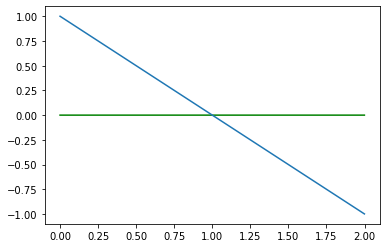

In [22]:
#vérification graphique :

alpha = np.arange(0,2,0.001)
det = []

z= np.zeros(len(alpha))
plt.plot(alpha, z, 'g')

for a in alpha:
    det.append(np.linalg.det(f(a)))
plt.plot(alpha, det)
    
#On constate que ça s'annule à 1

### Question 3   
Pour quelles valeurs de $\alpha$ la méthode de Gauss-Seidel converge-t-elle pour résoudre $A(\alpha)X=B$, où $B$ est un vecteur de $\mathbb R^3$ quelconque ?

On fixe $\omega$ à 1 pour la relaxation, comme ça c'est juste Gauss Seidel. On cherche alors la valeur de alpha qui donne le rayon spectrale le plus petit pour la matrice $M^{-1}N$


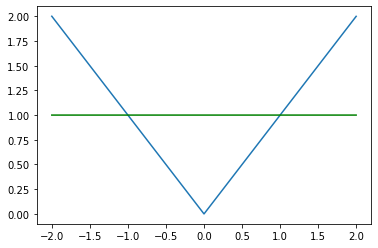

In [31]:
# si le rayon spectral est compris entre 0 et 1, alors la solution converge
def rayon_spectral(A, omega):
    E = np.tril(A, -1); F=np.triu(A, 1); D = np.diag(np.diag(A));
    M = D/omega + E; N= A-M;
    rho = np.max(np.abs(lg.eigvals(np.dot(lg.inv(M),N))))
    return rho

alpha = np.arange(-2,2,0.001) #arbitraire

spectral_array = []
for a in alpha:
    spectral_array.append(rayon_spectral(f(a), 1))
plt.plot(alpha, spectral_array)

z= np.ones(len(alpha))
plt.plot(alpha, z, 'g')

#pour toutes les valeurs en dessous de la ligne verte cela converge, sinon cela diverge
# on observe donc la convergence pour -1<alpha<1 avec alpha optimal à 0

### Question 4
On prend $\alpha=0$. Pour quelles valeurs de $\omega$ la méthode de relaxation converge-t-elle ?

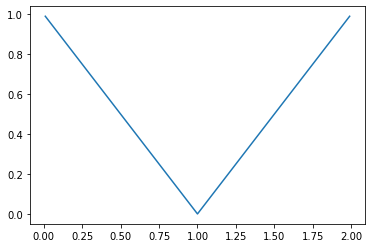

In [37]:
omega = np.arange(0.01,2,0.01) #arbitraire

spectral_array = []
for o in omega:
    spectral_array.append(rayon_spectral(f(0), o))
plt.plot(omega, spectral_array)


### Question 5
Illustrer ce dernier résultat sur le système $A(0)X=\left[\begin{array}{l}-1\\17\\2\end{array}\right]$, avec deux valeurs différentes de $\omega$.

